In [ ]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('merged_log.xlsx')

# Filter rows where ObjectType is 'person'
person_df = df[df['ObjectType'] == 'person']

# Convert the 'Time' column to datetime format
person_df['Time'] = pd.to_datetime(person_df['Time'])

# Define the time intervals (adjust as needed)
time_intervals = [
    ('00:00:00', '06:00:00'),
    ('06:00:00', '12:00:00'),
    ('12:00:00', '18:00:00'),
    ('18:00:00', '24:00:00')
]

# Initialize a dictionary to store counts for each time interval
time_interval_counts = {}

# Count occurrences within each time interval
for start, end in time_intervals:
    interval_count = ((person_df['Time'].dt.time >= pd.to_datetime(start).time()) &
                      (person_df['Time'].dt.time < pd.to_datetime(end).time())).sum()
    time_interval_counts[f'{start}-{end}'] = interval_count

# Print the counts for each time interval
for interval, count in time_interval_counts.items():
    print(f"Count of person between {interval}: {count}")


In [17]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
file_path = 'time_added_logs/merged_log.xlsx'
df = pd.read_excel(file_path)

# Define the North and South directions
North_directions = ['North', 'NorthEast', 'NorthWest']
South_directions = ['SouthEast', 'South', 'SouthWest']
objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
print(df2)
df = df2
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Define the time intervals (adjust as needed)
time_intervals = [
    ('15:44:24', '15:49:23'),
    ('15:49:24', '15:54:23'),
    ('16:04:24', '16:09:23'),
    ('16:19:24', '16:24:23'),
    ('16:34:24', '16:39:23'),
    ('16:49:24', '16:54:23'),
    ('17:04:24', '17:09:23'),
    ('17:34:24', '17:39:23'),
    ('17:19:24', '17:24:23'),
    ('17:49:24', '17:54:23')
]

# Initialize dictionaries to store counts for each direction and time interval
North_counts = {}
South_counts = {}

# Count occurrences for North and South directions within each time interval
for start, end in time_intervals:
    # Filter DataFrame for each time interval
    interval_df = df[(df['Time'].dt.time >= pd.to_datetime(start).time()) &
                     (df['Time'].dt.time < pd.to_datetime(end).time())]
    
    print(interval_df)
    # Count occurrences for North directions
    North_count = interval_df[interval_df['Direction'].isin(North_directions)]['Direction'].count()
    North_counts[f'{start}-{end}'] = North_count

    # Count occurrences for South directions
    South_count = interval_df[interval_df['Direction'].isin(South_directions)]['Direction'].count()
    South_counts[f'{start}-{end}'] = South_count

# Print the counts for each direction and time interval
print("Counts for North directions (Away from camera):")
for interval, count in North_counts.items():
    print(f"Count of North directions between {interval}: {count}")

print("\nCounts for South directions (Towards Camera):")
for interval, count in South_counts.items():
    print(f"Count of South directions between {interval}: {count}")


       FrameNumber  ObjectID ObjectType  Direction     Seconds      Time
0               16         0     person  NorthWest    0.533333  15:34:23
1               29         0     person  SouthWest    0.966667  15:34:23
3              129         0     person      North    4.300000  15:34:27
4              130         0     person  NorthWest    4.333333  15:34:27
5              197         0     person  SouthEast    6.566667  15:34:29
...            ...       ...        ...        ...         ...       ...
11871         2083         0     person  NorthEast  138.866667  18:12:25
11872         2094         0     person      North  139.600000  18:12:26
11873         2112         0     person      South  140.800000  18:12:27
11875         2160         0     person  SouthEast  144.000000  18:12:31
11877         2194         0     person  NorthWest  146.266667  18:12:33

[6829 rows x 6 columns]
      FrameNumber  ObjectID ObjectType  Direction     Seconds  \
673         18115         0     pe

/var/folders/d2/vfvjx2nn47d77zlp4l9ql4_40000gn/T/ipykernel_4694/2804604507.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


978
      FrameNumber  ObjectID ObjectType  Direction      Seconds      Time
0              92         0     person  SouthWest     6.133333  16:28:34
2             189         0     person       East    12.600000  16:28:40
4             206         0     person  SouthWest    13.733333  16:28:41
7             459         0     person       West    30.600000  16:28:58
9             697         0     person  SouthEast    46.466667  16:29:14
...           ...       ...        ...        ...          ...       ...
1366       109545         0     person  NorthEast  7303.000000  18:30:11
1367       109567         0     person  NorthEast  7304.466667  18:30:12
1368       109651         0     person  SouthWest  7310.066667  18:30:18
1369       109661         0     person  NorthEast  7310.733333  18:30:18
1370       109746         0     person  NorthEast  7316.400000  18:30:24

[978 rows x 6 columns]
North file saved successfully!!
South file saved successfully!!


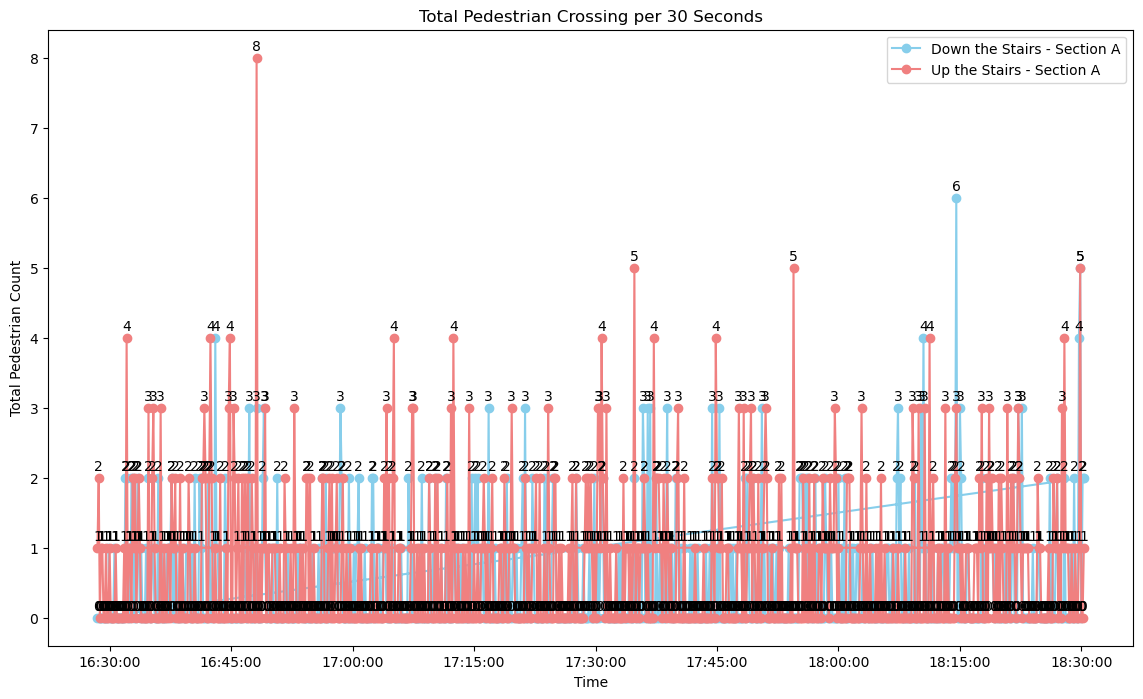

North count: 412
South count: 566


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = 'time_added_logs/HFR_20240326_182828A_clipped_line2.xlsx'
df = pd.read_excel(file_path)

objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
print(df)
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Filter the DataFrame to include only 'North' directions
North_directions = ['North', 'NorthEast', 'NorthWest']
df_north = df[df['Direction'].isin(North_directions)]

# Filter the DataFrame to include only 'South' directions
South_directions = ['SouthEast', 'South', 'SouthWest', 'East', 'West']
df_south = df[df['Direction'].isin(South_directions)]

# Group by Time and count the number of entries for 'North' and 'South' at 10-minute intervals
grouped_north = df_north.groupby(pd.Grouper(key='Time', freq='0.15T')).size().reset_index(name='North_Total_Count')
grouped_south = df_south.groupby(pd.Grouper(key='Time', freq='0.15T')).size().reset_index(name='South_Total_Count')

##Save North and South direction seperately per 9 seconds 0.15 T
# Save the DataFrame to an Excel file with the 'Time' column
grouped_north.to_excel('extra_post_processing/North.xlsx', index=False)
print('North file saved successfully!!')
grouped_south.to_excel('extra_post_processing/South.xlsx', index=False)
print('South file saved successfully!!')

# Merge the two DataFrames on Time
merged_data = pd.merge(grouped_north, grouped_south, on='Time', how='outer').fillna(0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 8))

# Line chart for North_Total_Count
ax.plot(merged_data['Time'], merged_data['North_Total_Count'], label='Down the Stairs - Section A', marker='o', linestyle='-', color='skyblue')

# Line chart for South_Total_Count
ax.plot(merged_data['Time'], merged_data['South_Total_Count'], label='Up the Stairs - Section A', marker='o', linestyle='-', color='lightcoral')

ax.set_xlabel('Time')
ax.set_ylabel('Total Pedestrian Count')
ax.set_title('Total Pedestrian Crossing per 30 Seconds')
ax.legend()

# Format the x-axis to show only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Display the numeric values on the line chart
for i, (north_value, south_value) in enumerate(zip(merged_data['North_Total_Count'], merged_data['South_Total_Count'])):
    ax.annotate(f'{int(north_value)}', (merged_data['Time'].iloc[i], north_value), textcoords="offset points", xytext=(0, 5), ha='center')
    ax.annotate(f'{int(south_value)}', (merged_data['Time'].iloc[i], south_value), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()
print('North count: '+ str(len(df_north)))
print('South count: '+ str(len(df_south)))

2574


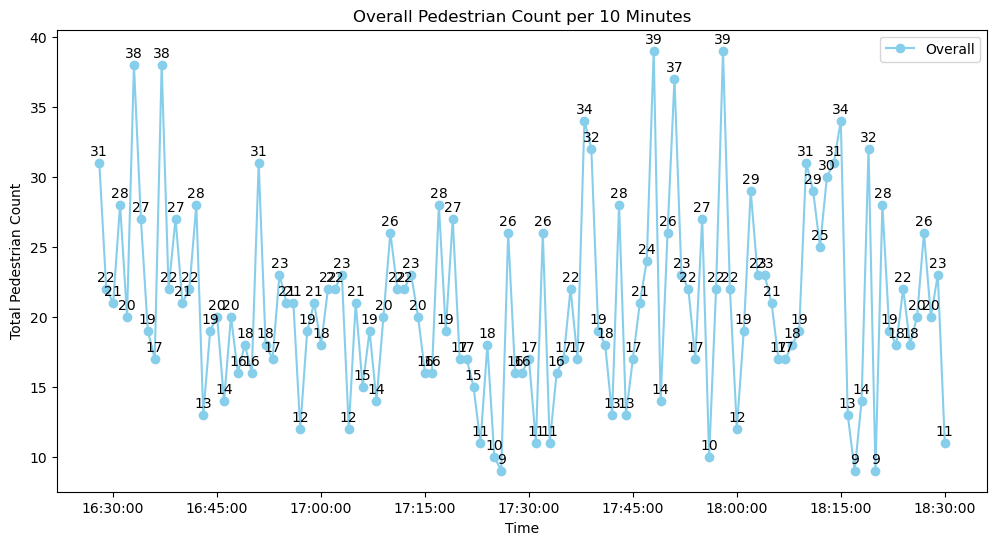

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = 'time_added_logs/HFR_20240326_182828A_clipped_line1.xlsx'
df = pd.read_excel(file_path)
objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Group by Time and count the total number of entries at 10-minute intervals
grouped_data = df.groupby(pd.Grouper(key='Time', freq='1T')).size().reset_index(name='Total_Count')

# Plot the line chart
fig, ax = plt.subplots(figsize=(12, 6))

# Line chart for Total_Count
ax.plot(grouped_data['Time'], grouped_data['Total_Count'], label='Overall', marker='o', linestyle='-', color='skyblue')

ax.set_xlabel('Time')
ax.set_ylabel('Total Pedestrian Count')
ax.set_title('Overall Pedestrian Count per 10 Minutes')
ax.legend()

# Format the x-axis to show only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Display the numeric values on the line chart
for i, total_count in enumerate(grouped_data['Total_Count']):
    ax.annotate(f'{int(total_count)}', (grouped_data['Time'].iloc[i], total_count), textcoords="offset points", xytext=(0, 5), ha='center')

# Show the plot
plt.show()


6829


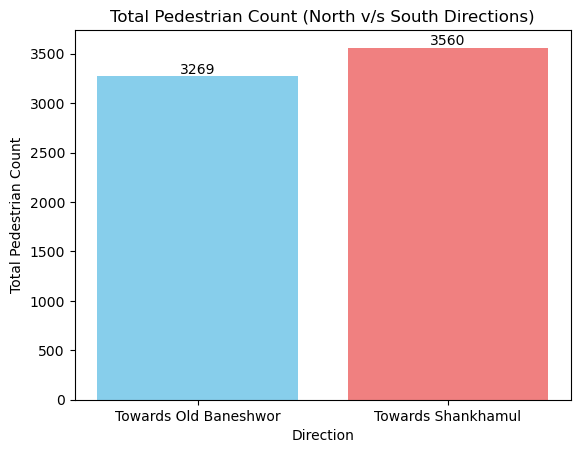

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'time_added_logs/merged_log.xlsx'
df = pd.read_excel(file_path)

objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2
print(len(df))
# Define the North and South directions
North_directions = ['North', 'NorthEast', 'NorthWest']
South_directions = ['SouthEast', 'South', 'SouthWest', 'East', 'West']

# Filter the DataFrame to include only 'North' directions
df_north = df[df['Direction'].isin(North_directions)]

# Filter the DataFrame to include only 'South' directions
df_south = df[df['Direction'].isin(South_directions)]

# Calculate total counts for North and South directions
total_north = df_north.shape[0]
total_south = df_south.shape[0]

# Create a bar graph
plt.bar(['Towards Old Baneshwor', 'Towards Shankhamul'], [total_north, total_south], color=['skyblue', 'lightcoral'])

# Add numeric values on top of the bars
for i, count in enumerate([total_north, total_south]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Labeling the plot
plt.xlabel('Direction')
plt.ylabel('Total Pedestrian Count')
plt.title('Total Pedestrian Count (North v/s South Directions)')

# Show the plot
plt.show()
